## About Convolutions

In [18]:
import torch
from PIL import Image
from torchvision import transforms
from matplotlib import pyplot as plt

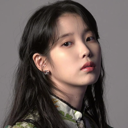

In [21]:
im_iu = Image.open('../sd-deepdive/images/iu.png').resize((128, 128)).convert("RGB")
im_iu

In [36]:
images = transforms.PILToTensor()(im_iu).unsqueeze(0) / 256
images.shape, images.dtype

(torch.Size([1, 3, 128, 128]), torch.float32)

## Testing Conv2D

In [71]:
conv1 = torch.nn.Conv2d(3, 8, kernel_size=5)

In [72]:
output = conv1(images).detach().cpu()
output.shape

torch.Size([1, 8, 124, 124])

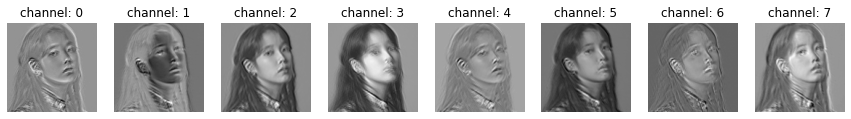

In [68]:
fig, ax = plt.subplots(1, 8, figsize=(15, 3))

for i in range(8):
    ax[i].imshow(output[0][i], cmap="gray")
    ax[i].axis('off')
    ax[i].set_title(f"channel: {i}")

Here are some things happend here:

* we provide an image with 3 dimensions (RGB). But this produce an image with 8 channels.
* in the above, the convd is not trained. So, that's it produce some generic channels like this. But, if trained, things will be different.
* the resolution of the original image is `128*128` but now it's `124*124`. (We will talk about that later)

In [46]:
conv1.weight.shape

torch.Size([8, 3, 5, 5])

This has 8 filters which runs for each of the channel. Each such filter has `5x5` pixel resolution. Which means it looks at that amount of pixels. 
That value is drives by the `kernel_size` param.

Here's how we can see all these filters. When trained. They might provide us valuable information inside each filter. Currently things are bit random.

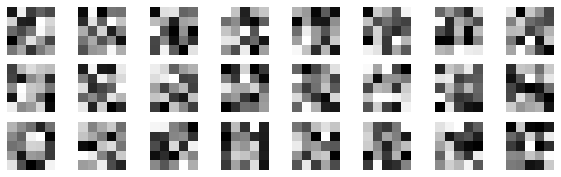

In [81]:
fig, ax = plt.subplots(3, 8, figsize=(10, 3))

for row in range(3):
    for col in range(8):
        ax[row][col].imshow(conv1.weight.detach().cpu()[col][row], cmap="gray")
        ax[row][col].axis('off')

### Kernal Movement & Output Pixel Size

Here, the output image's pixel size is not a big deal for the conv layer. That's because the filters are based on the channels. So, the output channel's pixel size is depends on the kernel size & how we move it. 

Let's learn about that now.

In [82]:
## Here's the original image shape
images.shape

torch.Size([1, 3, 128, 128])

In [84]:
## This is after apply a conv model. It reduce the image size.
## That's because kernal cannot move beyond the image.
_conv = torch.nn.Conv2d(3, 8, kernel_size=5)
_conv(images).shape

torch.Size([1, 8, 124, 124])

In [97]:
## But we can introduce padding to fix that issue
_conv = torch.nn.Conv2d(3, 8, kernel_size=5, padding=2)
_conv(images).shape

torch.Size([1, 8, 128, 128])

In [100]:
## We can use stride to set the pixel jump when moving the kernal
## This will helps to reduce the resulting channel size
_conv = torch.nn.Conv2d(3, 8, kernel_size=5, stride=2)
_conv(images).shape

torch.Size([1, 8, 62, 62])

## Testing MaxPool2D

We can use this to reduce the size of each channel.

In [106]:
_pool = torch.nn.MaxPool2d(kernel_size=2)
pooled_images = _pool(images).shape

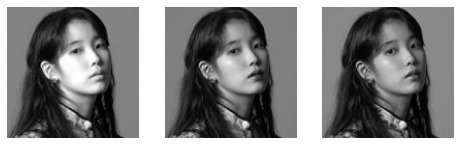

In [113]:
_, ax = plt.subplots(1, 3, figsize=(8, 3))

for i in range(3):
    ax[i].imshow(images[0][i], cmap="gray")
    ax[i].axis('off')

See. It reduced the image size. We can also use stride & padding as well.

In [115]:
_pool.weight

AttributeError: 'MaxPool2d' object has no attribute 'weight'

**Unlike conv2d, this is not a lernable model.**. So, we don't have weights.

## Testing Flatten

This is basically flatten tensors in any shape.

In [119]:
_flat = torch.nn.Flatten()
_flat(images).shape

torch.Size([1, 49152])

## Testing ConvTranspose2D

This is a learnable model, where we can increase the resolution. Basically a upscaling tool.

In [148]:
_trans = torch.nn.ConvTranspose2d(3, 3, kernel_size=4, stride=2)
upscales_images =_trans(images)
upscales_images.shape

torch.Size([1, 3, 258, 258])

In [149]:
_trans.weight.shape

torch.Size([3, 3, 4, 4])

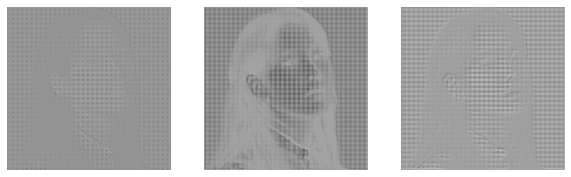

In [150]:
_, ax = plt.subplots(1, 3, figsize=(10, 3))

for i in range(3):
    ax[i].imshow(upscales_images.detach().cpu()[0][i], cmap="gray")
    ax[i].axis('off')

Currently, this will do some bad job at upscaling since we don't have any trained.